<a href="https://colab.research.google.com/github/jaya-deepthi/adsproject/blob/main/walmart_sales_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
train = pd.read_csv('/content/train.csv')
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')

In [ ]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


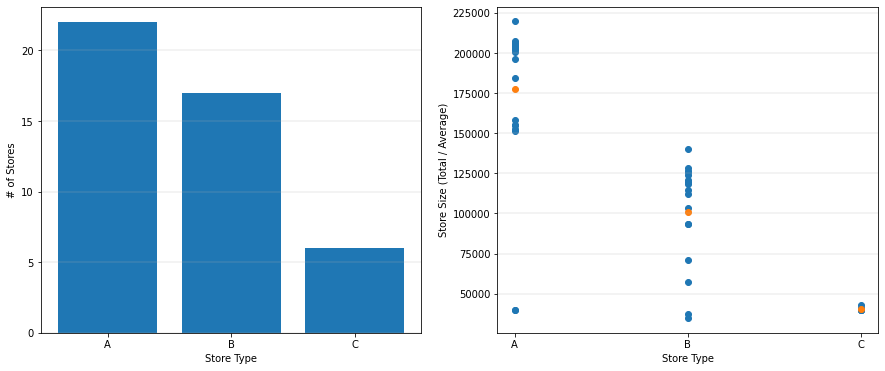

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].bar(stores['Type'].unique(), stores['Size'].groupby(stores['Type']).count())
ax[0].set_ylabel('# of Stores')
ax[0].set_xlabel('Store Type')
ax[0].yaxis.grid(True, linewidth=0.3)

ax[1].scatter(stores['Type'], stores['Size'])
ax[1].scatter(stores['Type'].unique(), stores['Size'].groupby(stores['Type']).mean()) 
ax[1].set_ylabel('Store Size (Total / Average)')
ax[1].set_xlabel('Store Type')
ax[1].yaxis.grid(True, linewidth=0.3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


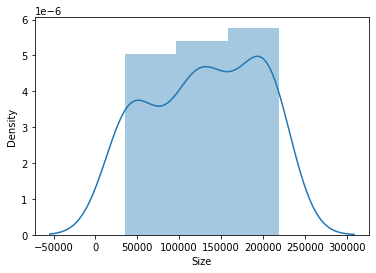

In [ ]:
sns.distplot(stores['Size'])

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MarkDown2,5269,0.643346
MarkDown4,4726,0.577045
MarkDown3,4577,0.558852
MarkDown1,4158,0.507692
MarkDown5,4140,0.505495
Unemployment,585,0.071429
CPI,585,0.071429
IsHoliday,0,0.000000
Fuel_Price,0,0.000000
Temperature,0,0.000000


In [ ]:
features_missing = features.isna().sum()/len(features)

<BarContainer object of 12 artists>

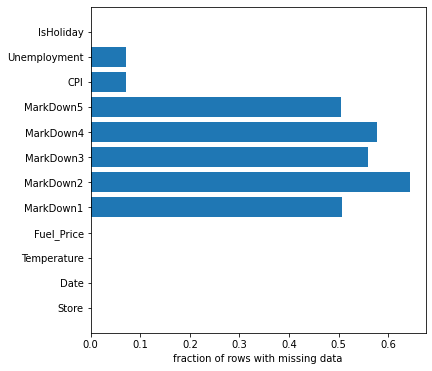

In [ ]:
plt.figure(figsize=(6,6))
plt.yticks(np.arange(len(features_missing)),features_missing.index,rotation='horizontal')
plt.xlabel('fraction of rows with missing data')
plt.barh(np.arange(len(features_missing)), features_missing)

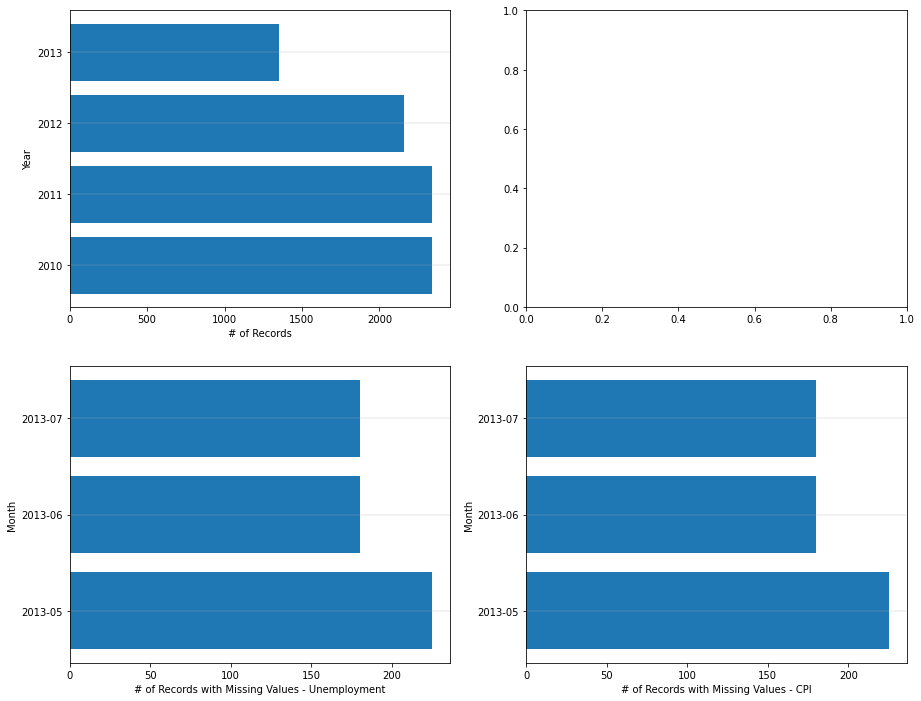

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15,12))

# Plot 1: Year Vs # of Records
ax[0,0].barh(features['Date'].str.slice(start=0, stop=4).unique(), 
          features['Date'].str.slice(start=0, stop=4).value_counts())
ax[0,0].set_xlabel('# of Records')
ax[0,0].set_ylabel('Year')
ax[0,0].yaxis.grid(True, linewidth=0.3)

# Plot 2: Month Vs # of Records with Missing Values - Unemployment
ax[1,0].barh(features['Date'].str.slice(start=0, stop=7)[features['Unemployment'].isna()].unique(), 
          features['Date'].str.slice(start=0, stop=7)[features['Unemployment'].isna()].value_counts())
ax[1,0].set_xlabel('# of Records with Missing Values - Unemployment')
ax[1,0].set_ylabel('Month')
ax[1,0].yaxis.grid(True, linewidth=0.3)

# Plot 3: Month Vs # of Records with Missing Values - CPI
ax[1,1].barh(features['Date'].str.slice(start=0, stop=7)[features['CPI'].isna()].unique(), 
          features['Date'].str.slice(start=0, stop=7)[features['CPI'].isna()].value_counts())
ax[1,1].set_xlabel('# of Records with Missing Values - CPI')
ax[1,1].set_ylabel('Month')
ax[1,1].yaxis.grid(True, linewidth=0.3)

In [ ]:
def distribution(data, features, transformed = False):
    """
    Visualization code for displaying distributions of features
    """
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(features):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Distributions of Continuous Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


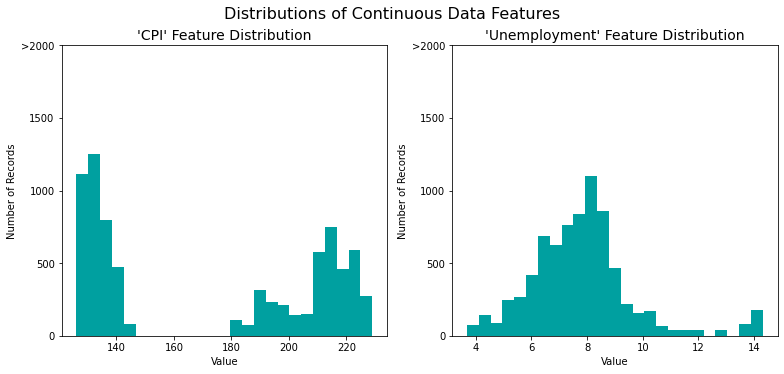

In [ ]:
distribution(features, ['CPI','Unemployment'])

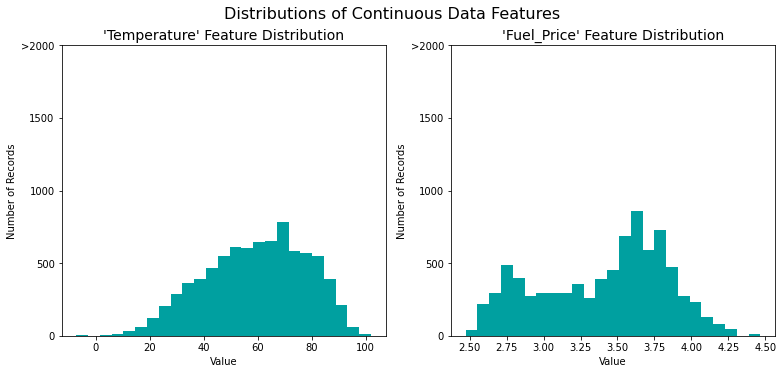

In [ ]:
distribution(features, ['Temperature','Fuel_Price'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


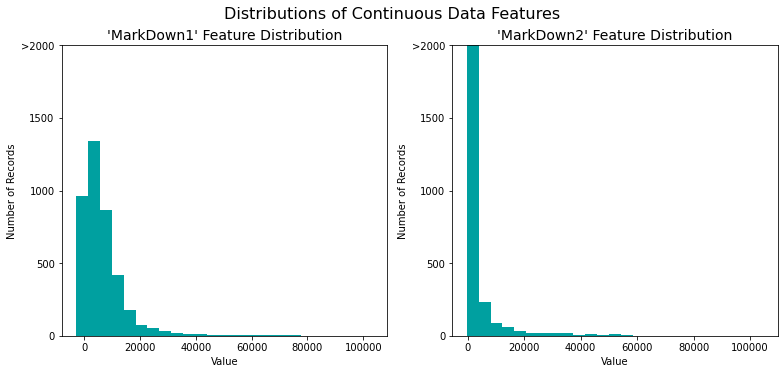

In [ ]:
distribution(features, ['MarkDown1','MarkDown2'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


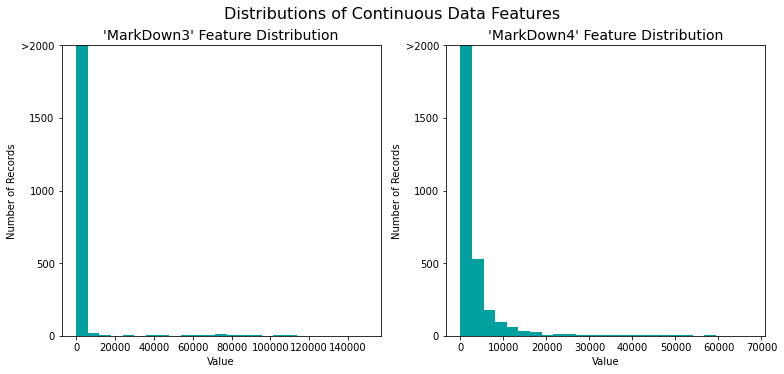

In [ ]:
distribution(features, ['MarkDown3','MarkDown4'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


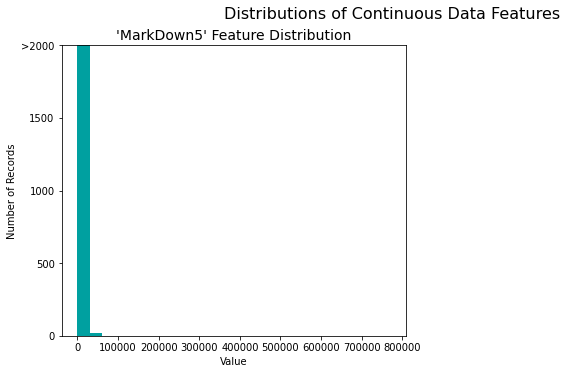

In [ ]:
distribution(features, ['MarkDown5'])

In [ ]:
train_m1 = train.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
train_merge = train_m1.merge(stores, on=['Store'], how='left').fillna(0)
train_data = train_merge.head(len(train_merge) - 450)
#The last 450 rows of data are split off into a validation dataset
train_validate = train_merge.tail(450)

In [ ]:
train_data.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421110,45,94,2012-02-17,7148.87,False,36.85,3.695,8683.43,7421.99,1.76,9084.92,1995.22,189.842483,8.424,B,118221
421111,45,94,2012-02-24,3413.84,False,42.86,3.739,9006.21,5786.94,2.00,4291.22,7626.46,190.006988,8.424,B,118221
421112,45,94,2012-03-02,4127.58,False,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,B,118221
421113,45,94,2012-03-09,4191.64,False,45.52,3.848,11139.34,678.08,1.99,3267.21,4971.47,190.335997,8.424,B,118221
421114,45,94,2012-03-16,429.56,False,50.56,3.862,5811.44,375.70,3.69,3444.05,2706.47,190.461896,8.424,B,118221
421115,45,94,2012-03-23,12.72,False,59.45,3.900,6296.25,334.42,4.56,873.47,1201.57,190.536321,8.424,B,118221
421116,45,94,2012-03-30,1270.75,False,50.04,3.953,9866.15,206.18,3.25,1815.37,1561.56,190.610746,8.424,B,118221
421117,45,94,2012-04-06,2853.87,False,49.73,3.996,13450.45,0.00,26.59,3363.54,3962.01,190.685171,8.567,B,118221
421118,45,94,2012-04-13,2863.76,False,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,B,118221
421119,45,94,2012-04-20,3110.30,False,63.13,4.027,9210.90,2667.05,6.25,970.33,2568.22,190.813801,8.567,B,118221


In [ ]:
train_validate

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421120,45,94,2012-04-27,3109.40,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,B,118221
421121,45,94,2012-05-04,3123.83,False,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,B,118221
421122,45,94,2012-05-11,3800.78,False,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,B,118221
421123,45,94,2012-05-18,5918.72,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,B,118221
421124,45,94,2012-05-25,2878.50,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,B,118221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Week'] = train_data['Date'].dt.week
train_data['YearWeek'] = train_data.Year.astype(str).str.cat(train_data.Week.astype(str))
train_data.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train_data['YearWeek'] = train_data.YearWeek.astype(int)
train_data = pd.get_dummies(train_data)
train_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we 

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315,20105,1,0,0
1,1,1,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,151315,20106,1,0,0
2,1,1,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,151315,20107,1,0,0
3,1,1,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,151315,20108,1,0,0
4,1,1,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,151315,20109,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421115,45,94,12.72,False,59.45,3.900,6296.25,334.42,4.56,873.47,1201.57,190.536321,8.424,118221,201212,0,1,0
421116,45,94,1270.75,False,50.04,3.953,9866.15,206.18,3.25,1815.37,1561.56,190.610746,8.424,118221,201213,0,1,0
421117,45,94,2853.87,False,49.73,3.996,13450.45,0.00,26.59,3363.54,3962.01,190.685171,8.567,118221,201214,0,1,0
421118,45,94,2863.76,False,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,118221,201215,0,1,0


In [ ]:
y = targets = labels = train_data["Weekly_Sales"].values

columns = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features = train_data[list(columns)].values
features
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.18, random_state=1)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=32, random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=32,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
regressor.score(X_test, y_test)

0.9210390524962895

In [ ]:
list(zip(columns, regressor.feature_importances_))

[('Store', 0.05296829000572884),
 ('Dept', 0.6293425505391306),
 ('YearWeek', 0.025067552291701357),
 ('IsHoliday', 0.003032698908389444),
 ('CPI', 0.027909622320034938),
 ('Unemployment', 0.011484705181047813),
 ('Size', 0.1839676781846934),
 ('Temperature', 0.015878605289541537),
 ('Fuel_Price', 0.011383741010612902),
 ('MarkDown1', 0.0012210274713202547),
 ('MarkDown2', 0.0016972173272374648),
 ('MarkDown3', 0.01709172822799941),
 ('MarkDown4', 0.0025549196810581874),
 ('MarkDown5', 0.0018452837863343907),
 ('Type_A', 0.00260188617199919),
 ('Type_B', 0.01171370396270277),
 ('Type_C', 0.00023878964046758128)]

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr.score(X_test, y_test)

0.7414631959871238

In [ ]:
list(zip(columns, gbr.feature_importances_))

[('Store', 0.02430086535829693),
 ('Dept', 0.7463098321770597),
 ('YearWeek', 0.0007896636080569066),
 ('IsHoliday', 0.0008618417757848632),
 ('CPI', 0.009197936639669878),
 ('Unemployment', 0.0003930648435354388),
 ('Size', 0.19012369620074268),
 ('Temperature', 0.0005666315306227785),
 ('Fuel_Price', 0.0),
 ('MarkDown1', 0.0),
 ('MarkDown2', 0.0),
 ('MarkDown3', 0.009970382062287383),
 ('MarkDown4', 0.0001400304430406006),
 ('MarkDown5', 0.0),
 ('Type_A', 0.00011674800158876078),
 ('Type_B', 0.015806656735878537),
 ('Type_C', 0.0014226506234356563)]

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:

rfr.score(X_test, y_test)

0.962008904853113

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg.score(X_test, y_test)

0.09171247456318421

In [ ]:
list(zip(columns, linreg.coef_))

[('Store', -142.38789697459308),
 ('Dept', 109.6501931093025),
 ('YearWeek', 0.004404201997530931),
 ('IsHoliday', 481.75848978123213),
 ('CPI', -24.902788707169325),
 ('Unemployment', -187.26807883487112),
 ('Size', 0.09667609367079684),
 ('Temperature', 4.433029171801944),
 ('Fuel_Price', -499.7880278210082),
 ('MarkDown1', 0.002312314383443172),
 ('MarkDown2', 0.005144205356322665),
 ('MarkDown3', 0.11537808930894256),
 ('MarkDown4', 0.03933468355418181),
 ('MarkDown5', 0.09348035346114063),
 ('Type_A', -1756.6540691258253),
 ('Type_B', -2197.274399753804),
 ('Type_C', 3953.9284688796297)]

In [ ]:
bayreg = BayesianRidge(compute_score=True)
bayreg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [ ]:
bayreg.score(X_test, y_test)

0.09170504000886914

In [ ]:
list(zip(columns, bayreg.coef_))

[('Store', -141.88974217226695),
 ('Dept', 109.65952275081185),
 ('YearWeek', 0.004384036972714661),
 ('IsHoliday', 474.6393627841227),
 ('CPI', -24.876981751250625),
 ('Unemployment', -186.05734336208863),
 ('Size', 0.096407885237558),
 ('Temperature', 4.541471749233413),
 ('Fuel_Price', -496.66033632559083),
 ('MarkDown1', 0.0020302613345761535),
 ('MarkDown2', 0.005299637258006832),
 ('MarkDown3', 0.11548958254976278),
 ('MarkDown4', 0.03961237795347405),
 ('MarkDown5', 0.09341077664879675),
 ('Type_A', -1721.5307199462259),
 ('Type_B', -2179.8102576418314),
 ('Type_C', 3901.3409776135813)]

In [ ]:
train_validate['Date'] = pd.to_datetime(train_validate['Date'])
train_validate['Year'] = train_validate['Date'].dt.year
train_validate['Week'] = train_validate['Date'].dt.week
train_validate['YearWeek'] = train_validate.Year.astype(str).str.cat(train_validate.Week.astype(str))
train_validate.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train_validate['YearWeek'] = train_validate.YearWeek.astype(int)
train_validate = pd.get_dummies(train_validate)
train_validate['Type_A'] = 0
train_validate['Type_C'] = 0
train_validate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we 

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_B,Type_A,Type_C
421120,45,94,3109.40,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,118221,201217,1,0,0
421121,45,94,3123.83,False,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,118221,201218,1,0,0
421122,45,94,3800.78,False,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,118221,201219,1,0,0
421123,45,94,5918.72,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,118221,201220,1,0,0
421124,45,94,2878.50,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,118221,201221,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,1,0,0
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,1,0,0
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,1,0,0
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,1,0,0


In [ ]:
columns2 = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_validate = train_validate[list(columns2)].values
features_validate

array([[45, 94, 201217, ..., 0, 1, 0],
       [45, 94, 201218, ..., 0, 1, 0],
       [45, 94, 201219, ..., 0, 1, 0],
       ...,
       [45, 98, 201241, ..., 0, 1, 0],
       [45, 98, 201242, ..., 0, 1, 0],
       [45, 98, 201243, ..., 0, 1, 0]], dtype=object)

In [ ]:
pred_vals = rfr.predict(features_validate)

In [ ]:
train_validate['Predicted'] = pred_vals
train_validate

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_B,Type_A,Type_C,Predicted
421120,45,94,3109.40,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,118221,201217,1,0,0,2814.1327
421121,45,94,3123.83,False,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,118221,201218,1,0,0,1995.3995
421122,45,94,3800.78,False,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,118221,201219,1,0,0,2556.8696
421123,45,94,5918.72,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,118221,201220,1,0,0,2518.8375
421124,45,94,2878.50,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,118221,201221,1,0,0,2604.5446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,1,0,0,330.5677
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,1,0,0,308.5564
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,1,0,0,399.3876
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,1,0,0,446.1046


In [ ]:
train_validate.drop(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'YearWeek', 'Type_B', 'Type_A', 'Type_C'], axis=1, inplace=True)
train_validate

,Store,Dept,Weekly_Sales,IsHoliday,Predicted
421120,45,94,3109.40,False,2814.1327
421121,45,94,3123.83,False,1995.3995
421122,45,94,3800.78,False,2556.8696
421123,45,94,5918.72,False,2518.8375
421124,45,94,2878.50,False,2604.5446
...,...,...,...,...,...
421565,45,98,508.37,False,330.5677
421566,45,98,628.10,False,308.5564
421567,45,98,1061.02,False,399.3876
421568,45,98,760.01,False,446.1046


In [ ]:
test = pd.read_csv('/content/test.csv')
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')
test_m1 = test.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
test_merge = test_m1.merge(stores, on=['Store'], how='left').fillna(0)

In [ ]:
test_merge['Date'] = pd.to_datetime(test_merge['Date'])
test_merge['Year'] = test_merge['Date'].dt.year
test_merge['Week'] = test_merge['Date'].dt.week
test_merge['YearWeek'] = test_merge.Year.astype(str).str.cat(test_merge.Week.astype(str))
test_merge.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
test_merge['YearWeek'] = test_merge.YearWeek.astype(int)
test_merge = pd.get_dummies(test_merge)
test_merge

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0


In [ ]:
columns3 =  ["Store", "Dept", "YearWeek", "IsHoliday", "Size", "Unemployment", "CPI", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_test = test_merge[list(columns2)].values
features_test

array([[1, 1, 201244, ..., 1, 0, 0],
       [1, 1, 201245, ..., 1, 0, 0],
       [1, 1, 201246, ..., 1, 0, 0],
       ...,
       [45, 98, 201328, ..., 0, 1, 0],
       [45, 98, 201329, ..., 0, 1, 0],
       [45, 98, 201330, ..., 0, 1, 0]], dtype=object)

In [ ]:
test_vals = rfr.predict(features_test)
test_vals

array([31760.0403, 30647.7875, 31054.8459, ...,   463.7461,   500.4471,
         547.1186])

In [ ]:
test_merge['PredictedWeeklySales'] = test_vals
test_merge

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C,PredictedWeeklySales
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0,31760.0403
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0,30647.7875
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0,31054.8459
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0,49123.0962
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0,50750.6707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0,426.7102
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0,437.8298
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0,463.7461
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0,500.4471


# Link for dataset

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

# Discription of the dataset

Dataset has provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week
test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# Discription of outcome of the project

The department and size of the store matter a lot the weekly sales. This is followed by date, CPI, unemployment, temperature and fuelprice. Type B stores seem to have more sales as compared to type A and C stores. Also Markdown3 has the most impact on the sales as compared to other markdowns.